In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm 

from utils.dataset_helpers import get_dataset
from tqdm.notebook import tqdm
from utils.dataset_helpers import get_dataset
from alipy.query_strategy.query_features import IterativeSVD_mc
l_vals = ["0.0", "0.01", "0.1", "0.5", "1.0"]
dataset_name = "abalone"
l_val = l_vals[0]
all_results = []
for l_val in l_vals:
    expmt = "results/" + dataset_name + "/Weighted_usr/601_0.1_0.2_uniform_0.5_0.5_uniform_" + l_val + "_False_20_1000_3"
    results = pd.read_csv(expmt + '/results_df')
    results['l_val'] = float(l_val)
    results['rmse'] = np.sqrt(results['mse'])
    all_results.append(results)
all_results = pd.concat(all_results)
all_results

,Unnamed: 0,dataset,acq_model,mse,cost_var,cost_mean,run,n_available,mc_model,l_val,rmse
0,0,<dataset.Dataset object at 0x7fa7919ca128>,Weighted,463.307439,0.725085,0.799856,0,3341,iterative_SVD,0.0,21.524578
1,1,<dataset.Dataset object at 0x7fa7919ca128>,Weighted,462.441514,0.778510,0.814221,0,3401,iterative_SVD,0.0,21.504453
2,2,<dataset.Dataset object at 0x7fa7919ca128>,Weighted,461.568837,0.825776,0.828585,0,3461,iterative_SVD,0.0,21.484153
3,3,<dataset.Dataset object at 0x7fa7919ca128>,Weighted,461.190221,0.876460,0.842949,0,3521,iterative_SVD,0.0,21.475340
4,4,<dataset.Dataset object at 0x7fa7919ca128>,Weighted,457.880646,0.933435,0.857314,0,3581,iterative_SVD,0.0,21.398146
...,...,...,...,...,...,...,...,...,...,...,...
10995,10995,<dataset.Dataset object at 0x7f79ce4ec0f0>,Weighted,466.350492,0.895800,0.886043,999,3701,iterative_SVD,1.0,21.595150
10996,10996,<dataset.Dataset object at 0x7f79ce4ec0f0>,Weighted,466.088276,0.931906,0.900407,999,3761,iterative_SVD,1.0,21.589078
10997,10997,<dataset.Dataset object at 0x7f79ce4ec0f0>,Weighted,465.444690,0.969514,0.914771,999,3821,iterative_SVD,1.0,21.574167
10998,10998,<dataset.Dataset object at 0x7f79ce4ec0f0>,Weighted,465.692038,0.999527,0.929136,999,3881,iterative_SVD,1.0,21.579899


In [4]:
def impute(mat, observed_idxs):
    observed_mask = np.zeros(mat.shape)
    for idx in observed_idxs:
        observed_mask[idx[0], idx[1]] = 1
    
    svd_mc = IterativeSVD_mc(rank=3)
    imputed_mat = svd_mc.impute(mat, observed_mask=observed_mask)
    return imputed_mat

def get_user_performance(dataset_name, observed_idxs):
    mat = get_dataset(dataset_name)
    n_users = mat.shape[0]
    # create observed matrix
    observed_mat = np.zeros(mat.shape)
    for idx in observed_idxs:
        observed_mat[idx[0], idx[1]] = mat[idx[0], idx[1]]
    
    # select test idxs
    test_feats_per_user = []
    n_eval_idxs = 2
    for i in range(n_users):
        unknown = np.where(observed_mat[i] == 0)[0]
        try:
            feats = np.random.choice(unknown, n_eval_idxs, replace=False)
            test_feats_per_user.append(feats)
        except:
            test_feats_per_user.append([])
    # matrix completion
    completed_mat = impute(mat, observed_idxs)
    
    # calculate user cost
    user_perf = []
    for i,idxs in zip(range(n_users), test_feats_per_user):
        if len(idxs) == 0:
            user_perf.append(-1)
            continue
        # I want to compare the test idxs in the completed_mat to the mat
        # and calculate the mse per user
        diff = completed_mat[i,idxs] - mat [i,idxs]
        perf = np.mean(np.square(diff))
        user_perf.append(perf)
    return np.array(user_perf)

In [ ]:
sns.lineplot(x='n_available', y='cost_var', hue='l_val', data=all_results)
plt.xlabel("# Available Observations")
plt.ylabel("Privacy Cost")
plt.title("User Group Method: Effect on Privacy Cost")

In [ ]:
sns.lineplot(x='n_available', y='rmse', hue='l_val', data=all_results)
plt.xlabel("# Available Observations")
plt.ylabel("Global Performance")
plt.title("User Group Method: Effect on Performance")

# How does this affect the distribution in user performance, compared to user performance? We look at an even weighting of privacy and performance cost

In [ ]:
l_val = "0.5"
idxs_path = "results/" + dataset_name + "/Weighted_usr/601_0.1_0.2_uniform_0.5_0.5_uniform_" + l_val + "_False_20_1000_3"
obse_idxs_pth = idxs_path + "/observed_mats.pkl"
init_idxs_pth = idxs_path + "/init_mats.pkl"
obse_idxs = pickle.load(open(obse_idxs_pth, 'rb'))
init_idxs = pickle.load(open(init_idxs_pth, 'rb'))


In [ ]:
run_idxs = 
obse_idxs = run_idxs[0]


In [5]:
l_vals = ["0.0", "0.01", "0.1", "0.5", "1.0"]
dataset_name = "abalone"
all_results = []
n_runs = 200
for l_val in l_vals:
    expmt = "results/" + dataset_name + "/Weighted_usr/601_0.1_0.2_uniform_0.5_0.5_uniform_" + l_val + "_False_20_1000_3"
    results = pd.read_csv(expmt + '/results_df')
    observed_idxs = pickle.load(open(expmt + '/observed_mats.pkl', 'rb'))
    
    results = results[results['n_available'] == 3941]
    results = results[results['run'] < n_runs]
    results['l_val'] = float(l_val)
    results['rmse'] = np.sqrt(results['mse'])
    all_results.append(results)

    # fill in urmse for each run
    run_urmse = dict()
    print(observed_idxs.shape)
    for i in tqdm(range(n_runs)):
        observed_idx = observed_idxs[i]
        user_perf = get_user_performance(dataset_name, observed_idx)
        run_urmse[i] = np.mean(user_perf)
    results['umse'] = results['run'].map(run_urmse)
        
all_results = pd.concat(all_results)

(1000, 4001, 2)



(1000, 4001, 2)



(1000, 4001, 2)



(1000, 4001, 2)



(1000, 4001, 2)


In [23]:
l_vals = ["0.0", "0.01", "0.01", "0.25", "0.5"]
dataset_name = "abalone"
greedy_results = []
n_runs = 5
for l_val in l_vals:
    expmt = "results/" + dataset_name + "/Weighted/501_0.1_0.2_uniform_0.5_0.5_uniform_" + l_val + "_False_50_5"
    results = pd.read_csv(expmt + '/results_df')
    observed_idxs = pickle.load(open(expmt + '/observed_mats.pkl', 'rb'))
    
    results = results[results['n_available'] == np.max(results['n_available'])]
    results = results[results['run'] < n_runs]
    results['l_val'] = float(l_val)
    results['rmse'] = np.sqrt(results['mse'])

    # fill in urmse for each run
    run_urmse = dict()
    print(observed_idxs.shape)
    for i in tqdm(range(n_runs)):
        observed_idx = observed_idxs[i]
        user_perf = get_user_performance(dataset_name, observed_idx)
        run_urmse[i] = np.mean(user_perf)
    results['umse'] = results['run'].map(run_urmse)
    greedy_results.append(results)
        
greedy_results = pd.concat(greedy_results)

(5, 3891, 2)



(5, 3891, 2)



(5, 3891, 2)



(5, 3891, 2)



(5, 3891, 2)


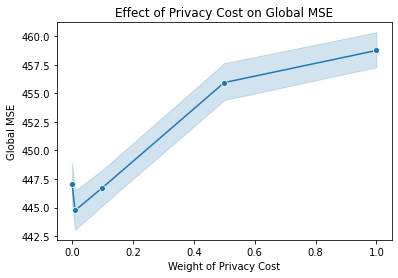

In [34]:
y_col = 'mse'
sns.lineplot(x='l_val', y=y_col, data=all_results, marker='o')
#sns.lineplot(x='l_val', y='mse', data=all_results, marker='o')
plt.xlabel("Weight of Privacy Cost")
if y_col == 'umse':
    plt.ylabel("User MSE")
    plt.title("Effect of Privacy Cost on User MSE")
else:
    plt.ylabel("Global MSE")
    plt.title("Effect of Privacy Cost on Global MSE")

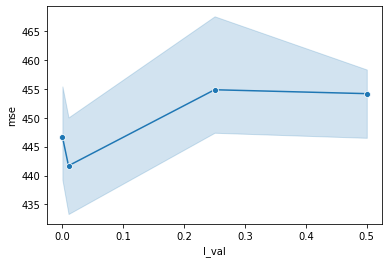

In [30]:
#sns.lineplot(x='l_val', y='umse', data=greedy_results, marker='o')
sns.lineplot(x='l_val', y='mse', data=greedy_results, marker='o')